In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training.csv to training.csv


In [ ]:
uploaded_test = files.upload()

Saving test.csv to test.csv


In [ ]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('training.csv')

In [ ]:
test = pd.read_csv('test.csv')

## Exploratory Data Analytics

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
print(train.shape)
print(test.shape)

(4250, 20)
(750, 20)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
#untuk melihat korelasi tiap kolom
train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893


In [ ]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

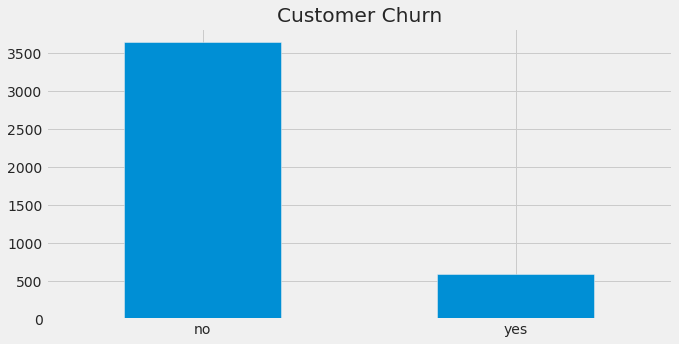

In [ ]:
plt.figure(figsize=(10,5))
train['churn'].value_counts().plot(kind = 'bar',rot=0, title = 'Customer Churn')
plt.show()

In [ ]:
train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

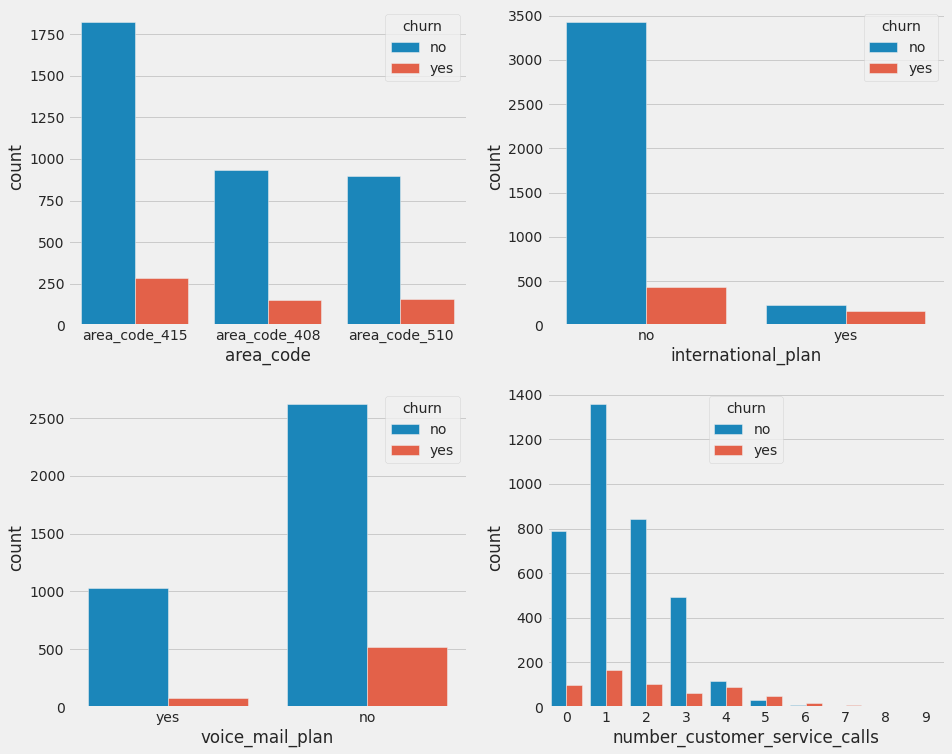

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
sns.countplot(data=train, x='area_code', hue='churn', ax=ax[0][0])
sns.countplot(data=train, x='international_plan', hue='churn', ax=ax[0][1])
sns.countplot(data=train, x='voice_mail_plan', hue='churn', ax=ax[1][0])
sns.countplot(data=train, x='number_customer_service_calls', hue='churn', ax=ax[1][1])
plt.show()

From the chart above we could see some insight:

the area 415 is have the most retention from all area (we could check the demography, their annual revenue, etc)
people who doesn't have international plan more likely retain in this provider (the ISP (internet service provider) may consider making a new promos for "roaming" person
the churn decision usually take after the 1st CS calls, we could see the number of retain and churn is highest on those number

## Preprocessing

In [ ]:
cleaned_train = train.drop(['churn'],axis=1)
label = train['churn']

In [ ]:
print("melihat missing value tiap kolom:\n", cleaned_train.isna().sum())
print("\ntotal missing value secara keseluruhan:", cleaned_train.isna().sum().sum())

melihat missing value tiap kolom:
 state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

total missing value secara keseluruhan: 0


In [ ]:
print("melihat missing value tiap kolom test:\n", test.isna().sum())
print("total missing value test secara keseluruhan:\n", test.isna().sum().sum())

melihat missing value tiap kolom test:
 id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64
total missing value test secara keseluruhan:
 0


In [ ]:
#kita pisah data numerik dan kategorik
numeric = cleaned_train.select_dtypes(include=[np.number])
categorical = cleaned_train.select_dtypes(exclude=[np.number])

In [ ]:
numeric_test = test.select_dtypes(include=[np.number])
categorical_test = test.select_dtypes(exclude=[np.number])

In [ ]:
numeric.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [ ]:
categorical.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

In [ ]:
cleaned_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
cleaned_train['churn'] = label

# Membersihkan outlier

In [ ]:
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(cleaned_train)}')

filtered_entries = np.array([True] * len(cleaned_train))
for col in ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']:
    zscore = abs(stats.zscore(cleaned_train[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
cleaned_train = cleaned_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(cleaned_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 4180


# Encoding

In [ ]:
for cat in categorical:
    s = pd.Series(cleaned_train[cat])
    onehots = pd.get_dummies(s, prefix=cat)
    cleaned_train = cleaned_train.join(onehots)

In [ ]:
cleaned_train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,1,0,1,0,0,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,1,0,1,0,1,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,1,0,0,0,1,1,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,1,0,0,1,1,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,0,0,0,0,0,1,1,0,0,1


In [ ]:
cleaned_train = cleaned_train.drop(['state','area_code','international_plan','voice_mail_plan'], axis=1)

In [ ]:
cleaned_test = test

In [ ]:
for i in categorical_test:
    s2 = pd.Series(cleaned_test[i])
    onehots2 = pd.get_dummies(s2, prefix=i)
    cleaned_test = cleaned_test.join(onehots2)

In [ ]:
cleaned_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,0,0,0,0,1,0,1,0,0,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,0,0,0,0,0,1,0,1,1,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,0,0,0,0,1,0,1,0,1,0
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,0,0,0,0,0,1,1,0,1,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,0,0,0,0,1,0,1,0,1,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,0,0,0,1,0,0,1,0,1,0
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,0,1,0,0,1,0,1,0,1,0
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
cleaned_test = cleaned_test.drop(['id','state','area_code','international_plan','voice_mail_plan'], axis=1)

In [ ]:
cleaned_test

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,1,0,0,1
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,1,0,1,1,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,...,0,0,0,0,1,0,1,0,1,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,...,0,0,0,0,0,1,1,0,1,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,119.4,99,20.30,226.3,97,19.24,202.7,111,...,0,0,0,0,1,0,1,0,1,0
746,73,0,177.2,118,30.12,270.5,84,22.99,241.8,112,...,0,0,0,1,0,0,1,0,1,0
747,152,0,184.2,90,31.31,256.8,73,21.83,213.6,113,...,0,1,0,0,1,0,1,0,1,0
748,61,0,140.6,89,23.90,172.8,128,14.69,212.4,97,...,0,0,0,0,1,0,1,0,1,0


# Split Data

In [ ]:
y = cleaned_train['churn']
X = cleaned_train.drop('churn', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(3135, 73)
(3135,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1045, 73)
(1045,)


## Modelling

# Logistic Regression with Class Weight

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
log_model2 = LogisticRegression(class_weight ="balanced").fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_test_pred2 = log_model2.predict(X_test)
print(classification_report(y_test_pred2,y_test))

              precision    recall  f1-score   support

          no       0.74      0.94      0.83       710
         yes       0.71      0.31      0.43       335

    accuracy                           0.74      1045
   macro avg       0.73      0.63      0.63      1045
weighted avg       0.73      0.74      0.70      1045



In [ ]:
confusion_matrix(y_test, y_test_pred2)

array([[667, 230],
       [ 43, 105]])

the f1 score and recall value is so low even thought the class weight is being used, so I will try to do modelling with another algorithm

# Random Forest with CV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf_2 = RandomForestClassifier(class_weight='balanced',random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5,6,7)
}

rf_clf_randomcv_2 = RandomizedSearchCV(rf_clf_2, parameters, cv=10, n_iter=100)
rf_clf_randomcv_2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 35 is smaller than n_iter=100. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': (1, 2, 3, 4, 5, 6, 7),
                                        'n_estimators': (10, 20, 30, 40, 50)})

In [ ]:
rf_clf_randomcv_2.score(X_test, y_test)

0.9272727272727272

In [ ]:
cv_result = pd.DataFrame(rf_clf_randomcv_2.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
34,"{'n_estimators': 50, 'max_depth': 7}",0.918962,1
33,"{'n_estimators': 40, 'max_depth': 7}",0.917366,2
32,"{'n_estimators': 30, 'max_depth': 7}",0.912272,3
31,"{'n_estimators': 20, 'max_depth': 7}",0.905895,4
30,"{'n_estimators': 10, 'max_depth': 7}",0.903343,5
26,"{'n_estimators': 20, 'max_depth': 6}",0.897920,6
28,"{'n_estimators': 40, 'max_depth': 6}",0.896647,7
29,"{'n_estimators': 50, 'max_depth': 6}",0.896325,8
27,"{'n_estimators': 30, 'max_depth': 6}",0.895692,9
25,"{'n_estimators': 10, 'max_depth': 6}",0.895682,10


In [ ]:
y_pred_2 = rf_clf_randomcv_2.best_estimator_.predict(X_test)
y_pred_22 = rf_clf_randomcv_2.best_estimator_
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

          no       0.97      0.95      0.96       897
         yes       0.72      0.80      0.76       148

    accuracy                           0.93      1045
   macro avg       0.84      0.88      0.86      1045
weighted avg       0.93      0.93      0.93      1045



In [ ]:
y_pred_2_proba = log_model2.predict_proba(X_test)[::,1]

bins = [0,0.1,0.25,0.5,0.75,1]
binned = pd.cut(y_pred_2_proba, bins)

In [ ]:
y_pred_2_proba

array([0.24893108, 0.51448351, 0.66896751, ..., 0.20716852, 0.47576362,
       0.11121052])

### Predict data test

In [ ]:
pred_data = rf_clf_randomcv_2.best_estimator_.predict(cleaned_test)

In [ ]:
pred_label = pd.DataFrame(pred_data, columns = ['label'])

In [ ]:
hasil = pd.concat([test,pred_label],axis=1)

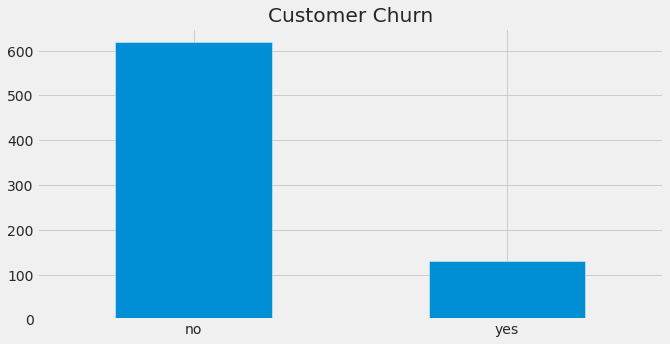

In [ ]:
plt.figure(figsize=(10,5))
hasil['label'].value_counts().plot(kind = 'bar',rot=0, title = 'Customer Churn')
plt.show()

In [ ]:
hasil['label'].value_counts()

no     620
yes    130
Name: label, dtype: int64